In [3]:
import numpy as np
import utm

from bluesky.tools import geo
from shapely.geometry import LineString, LinearRing, MultiLineString,Point

Using Python-based geo functions


In [4]:
data = np.load('routes/commercial/C.npy')

In [5]:
ls = []
for i in range(data.shape[0]):
    ls.append(LineString([[data[i][1],data[i][0]],[data[i][3],data[i][2]]]))
              
mls = MultiLineString(ls)

In [6]:
lon1, lat1, lon2, lat2 = mls.bounds

In [7]:
mls.bounds

(-95.0246, 40.0, -90.1034, 43.0)

In [8]:
h, d = geo.qdrdist(lat2,lon2,lat1,lon1)

In [9]:
radius = d // 2

lon_c, lat_c = list(mls.centroid.coords)[0]

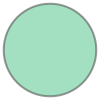

In [10]:
circle = Point(1,1).buffer(2)
circle

In [11]:
r_m = radius*geo.nm

In [12]:
x_c,y_c,n,l = utm.from_latlon(lat_c,lon_c)

In [13]:
def checkPoint(x1,y1,x2,y2,ls,threshold):
    
    
    for j in range(len(ls)):
        old_ls = ls[j]
        
        start,end = list(old_ls.coords)
        
        x_1,y_1 = start
        xe_1,ye_1 = end
        
        # distance start to old LS start
        dx = np.sqrt((x_1-x1)**2 + (y_1-y1)**2)/geo.nm
        
        # distance start to old LS end
        dx_1 = np.sqrt((xe_1-x1)**2 + (ye_1-y1)**2)/geo.nm
        
        # distance end to old LS end
        dx_2 = np.sqrt((xe_1-x2)**2 + (ye_1-y2)**2)/geo.nm
        
        # distance end to old LS start
        dx_3 = np.sqrt((x_1-x2)**2 + (y_1-y2)**2)/geo.nm
        
        
        
        dist = np.array([dx,dx_1,dx_2,dx_3])
        
        # feasible route
        if any(dist <= threshold):
            return False
    
    return True

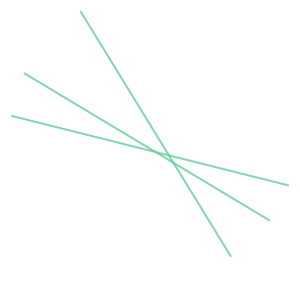

In [129]:

n_routes = np.random.randint(2,6)
degrees = 20
threshold = 30

ls = []

count = 0

while count < n_routes:


    angle = np.random.uniform(0,2*np.pi)
    x = r_m*np.sin(angle) + x_c
    y = r_m*np.cos(angle) + y_c
    
    random_end = np.random.uniform(np.pi-np.radians(degrees),np.pi+np.radians(degrees))
    
    xe =  r_m*np.sin(angle+random_end) + x_c
    ye =  r_m*np.cos(angle+random_end) + y_c
    
    
    if checkPoint(x,y,xe,ye,ls,threshold):
        
        count += 1
        ls.append(LineString([[x,y],[xe,ye]]))

    
MultiLineString(ls)

In [59]:
for lines in ls:
    lines

In [63]:
start,end = list(lines.coords)

In [66]:
x_start,y_start = start
x_end, y_end = end

In [71]:
lat_start,lon_start = utm.to_latlon(x_start,y_start,n,l)
lat_end,lon_end = utm.to_latlon(x_end,y_end,n,l)

In [72]:
h, d = geo.qdrdist(lat_start,lon_start,lat_end,lon_end)
print(h)

137.4016019159112


In [ ]:
def geneate_route():
    n_routes = np.random.randint(2,6)
    degrees = 20
    threshold = 30

    ls = []

    count = 0

    while count < n_routes:


        angle = np.random.uniform(0,2*np.pi)
        x = r_m*np.sin(angle) + x_c
        y = r_m*np.cos(angle) + y_c

        random_end = np.random.uniform(np.pi-np.radians(degrees),np.pi+np.radians(degrees))

        xe =  r_m*np.sin(angle+random_end) + x_c
        ye =  r_m*np.cos(angle+random_end) + y_c


        if checkPoint(x,y,xe,ye,ls,threshold):

            count += 1
            ls.append(LineString([[x,y],[xe,ye]]))


In [116]:
ls

In [106]:
all(np.array(dist) > 20)

True

In [108]:
count

0

In [100]:
np.array(dist) > 150

array([False,  True, False,  True])

In [99]:
np.array(dist)

array([142.85957407, 197.22195867, 142.85957407, 197.22195867])

In [63]:
f = LineString([[x,y],[xe,ye]])

In [77]:
list(old_ls.coords)

[(777713.0600356099, 4801726.305639927),
 (352053.97095480724, 4376067.216559124)]

In [92]:
dx_2/geo.nm

44.23696783657674

In [87]:
r_m/geo.nm

142.0